## carter_taxa_heatmaps.ipynb

In [1]:
from qiime2 import Artifact
from qiime2.plugins import feature_table
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.set(style='whitegrid')
plt.rcParams["font.family"] = "Times New Roman"

### Prepare data

#### Paths

In [3]:
path_b_map = '/Users/luke.thompson/carter/metadata/14693_analysis_mapping_cleaned_bleaching.txt'
path_c_map = '/Users/luke.thompson/carter/metadata/14693_analysis_mapping_cleaned_corallimorph.txt'
path_b_biom = '/Users/luke.thompson/carter/post-tourmaline/bleaching_biom_dada2_pe_filtered.qza'
path_c_biom = '/Users/luke.thompson/carter/post-tourmaline/corallimorph_biom_dada2_pe_filtered.qza'
path_b_tax = '/Users/luke.thompson/carter/tourmaline-bleaching/03-repseqs/dada2-pe/taxonomy.qza'
path_c_tax = '/Users/luke.thompson/carter/tourmaline-corallimorph/03-repseqs/dada2-pe/taxonomy.qza'

#### Import metadata

In [4]:
df_b_map = pd.read_csv(path_b_map, sep='\t', index_col=0)
df_c_map = pd.read_csv(path_c_map, sep='\t', index_col=0)

#### Import taxonomy, convert to DataFrame

In [5]:
b_tax_artifact = Artifact.load(path_b_tax)
b_tax = b_tax_artifact.view(view_type=pd.DataFrame)

In [6]:
c_tax_artifact = Artifact.load(path_c_tax)
c_tax = c_tax_artifact.view(view_type=pd.DataFrame)

#### Import DADA2 filtered biom tables, convert to relative frequency, convert to DataFrame

In [7]:
b_table_filt = Artifact.load(path_b_biom)
b_table_filt_rel_result = feature_table.methods.relative_frequency(table=b_table_filt)
b_table_filt_rel = b_table_filt_rel_result.relative_frequency_table
df_b5_filt_rel = b_table_filt_rel.view(pd.DataFrame)

In [8]:
c_table_filt = Artifact.load(path_c_biom)
c_table_filt_rel_result = feature_table.methods.relative_frequency(table=c_table_filt)
c_table_filt_rel = c_table_filt_rel_result.relative_frequency_table
df_c5_filt_rel = c_table_filt_rel.view(pd.DataFrame)

#### Add metadata, average over species and treatment groups

In [9]:
df_b5_filt_rel = df_b5_filt_rel.join(df_b_map[['host_scientific_name', 'coral_health_plus_year']])
df_b5_filt_rel_group = df_b5_filt_rel.groupby(['host_scientific_name', 'coral_health_plus_year']).mean()


In [10]:
df_c5_filt_rel = df_c5_filt_rel.join(df_c_map[['host_scientific_name', 'zone_plus_year']])
df_c5_filt_rel_group = df_c5_filt_rel.groupby(['host_scientific_name', 'zone_plus_year']).mean()
df_c5_filt_rel_group = df_c5_filt_rel_group[df_c5_filt_rel_group.sum().sort_values(ascending=False).index]

### Heatmaps

#### Split by species, sort ASVs by total abundance, plot heatmap

#### Bleaching

In [11]:
ax.set_xticklabels?

Object `ax.set_xticklabels` not found.


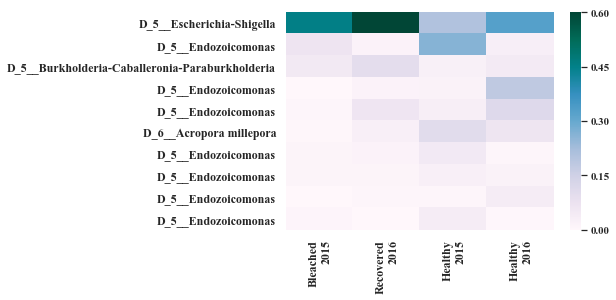

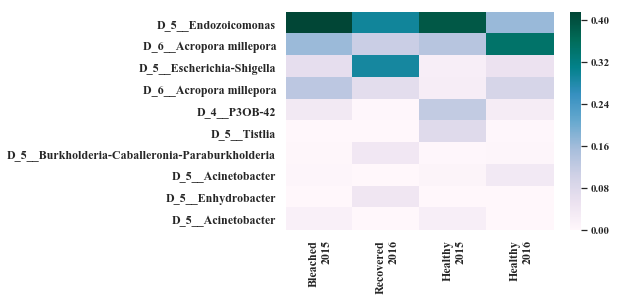

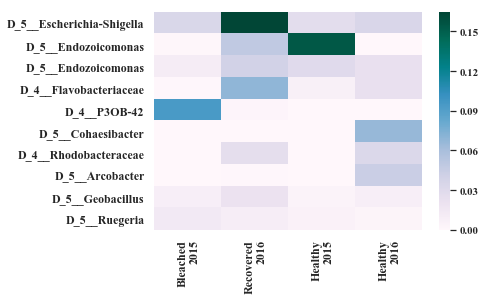

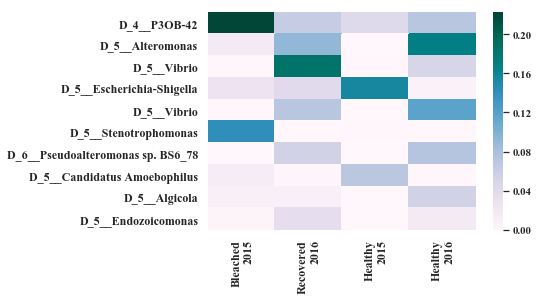

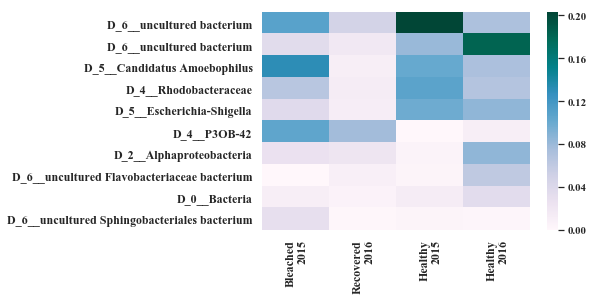

In [12]:
for species in df_b5_filt_rel_group.index.levels[0]:

    df_b5_filt_rel_group_sp = df_b5_filt_rel_group.loc[species]
    df_b5_filt_rel_group_sp = df_b5_filt_rel_group_sp[df_b5_filt_rel_group_sp.sum().sort_values(ascending=False).index]
    df_plot = df_b5_filt_rel_group_sp.iloc[:,:10]

    fig, ax = plt.subplots()
    sns.heatmap(df_plot.T, cmap='PuBuGn')

    labels_rename = {'bleached_2015': 'Bleached\n2015', 'bleached_2016': 'Recovered\n2016',
                     'healthy_2015': 'Healthy\n2015', 'healthy_2016': 'Healthy\n2016'}
    labels = [labels_rename[x] for x in df_plot.index]
    ax.set_xticks([0.7, 1.7, 2.7, 3.7])
    ax.set_xticklabels(labels, size=12, rotation=90, horizontalalignment='right')
    ax.set_xlabel('')
    
    taxa = [b_tax.loc[x]['Taxon'].split(';')[-1] for x in df_plot.columns]
    ax.set_yticklabels(taxa, size=12)
    
    fig.savefig('../figures/heatmap_bleaching_%s.pdf' % re.sub(' ', '_', species), bbox_inches = 'tight')

#### Corallimorph

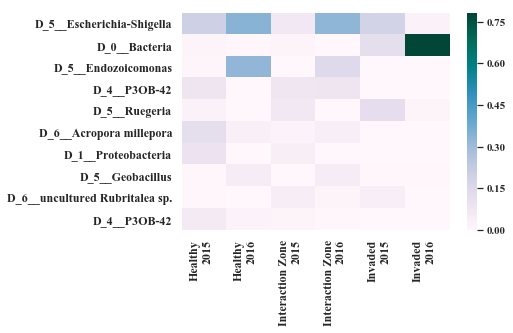

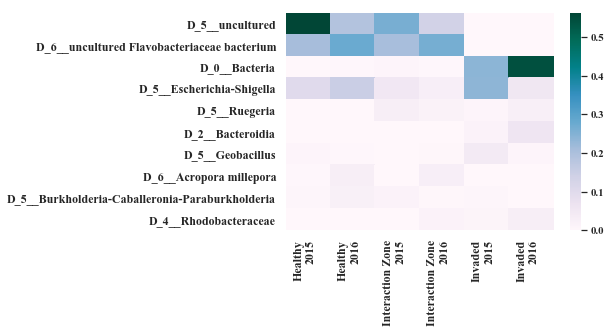

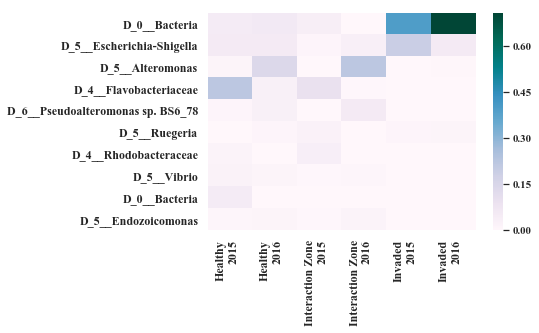

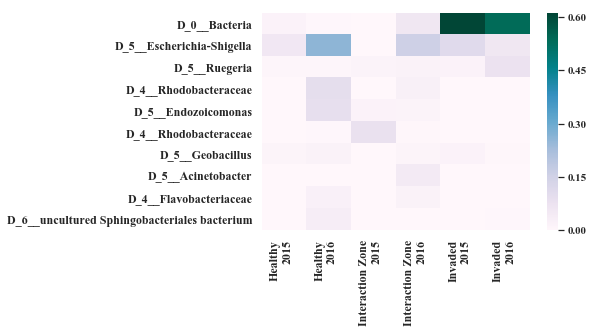

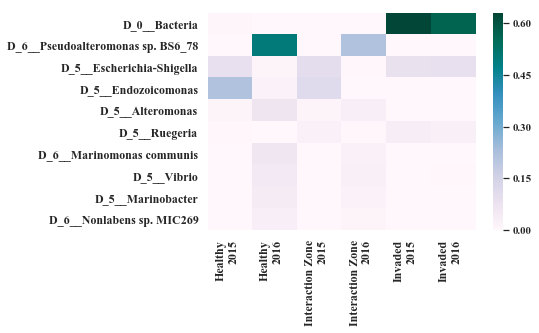

In [13]:
for species in df_c5_filt_rel_group.index.levels[0]:

    df_c5_filt_rel_group_sp = df_c5_filt_rel_group.loc[species]
    df_c5_filt_rel_group_sp = df_c5_filt_rel_group_sp[df_c5_filt_rel_group_sp.sum().sort_values(ascending=False).index]
    df_plot = df_c5_filt_rel_group_sp.iloc[:,:10]
    
    fig, ax = plt.subplots()
    sns.heatmap(df_plot.T, cmap='PuBuGn')

    labels_rename = {'AB_2015': 'Healthy\n2015', 'AB_2016': 'Healthy\n2016',
                     'CD_2015': 'Interaction Zone\n2015', 'CD_2016': 'Interaction Zone\n2016',
                     'EF_2015': 'Invaded\n2015', 'EF_2016': 'Invaded\n2016'}
    labels = [labels_rename[x] for x in df_plot.index]
    ax.set_xticks([0.7, 1.7, 2.7, 3.7, 4.7, 5.7])
    ax.set_xticklabels(labels, size=12, rotation=90, horizontalalignment='right')
    ax.set_xlabel('')

    taxa = [c_tax.loc[x]['Taxon'].split(';')[-1] for x in df_plot.columns]
    ax.set_yticklabels(taxa, size=12)

    fig.savefig('../figures/heatmap_corallimorph_%s.pdf' % re.sub(' ', '_', species), bbox_inches = 'tight')